In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold

In [2]:
#Visualization Setup
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = (15,15)

In [3]:
#Load Data
df = pd.read_csv("Avila-DataSet for miniprojects.csv")
x = df.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y", axis=1)
y = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]

In [5]:
#Split Data 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=3)

In [6]:
#Create Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#Create a Model
model = MLPClassifier(hidden_layer_sizes=(220,220,220), random_state=3)

In [10]:
#Training the Model
start_time = time.time()
model.fit(x_train,y_train)
run_time = time.time() - start_time
print("Run time: ", run_time)
y_hat = model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Run time:  188.9291548728943
Accuracy:  0.9837086727359846


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (12).

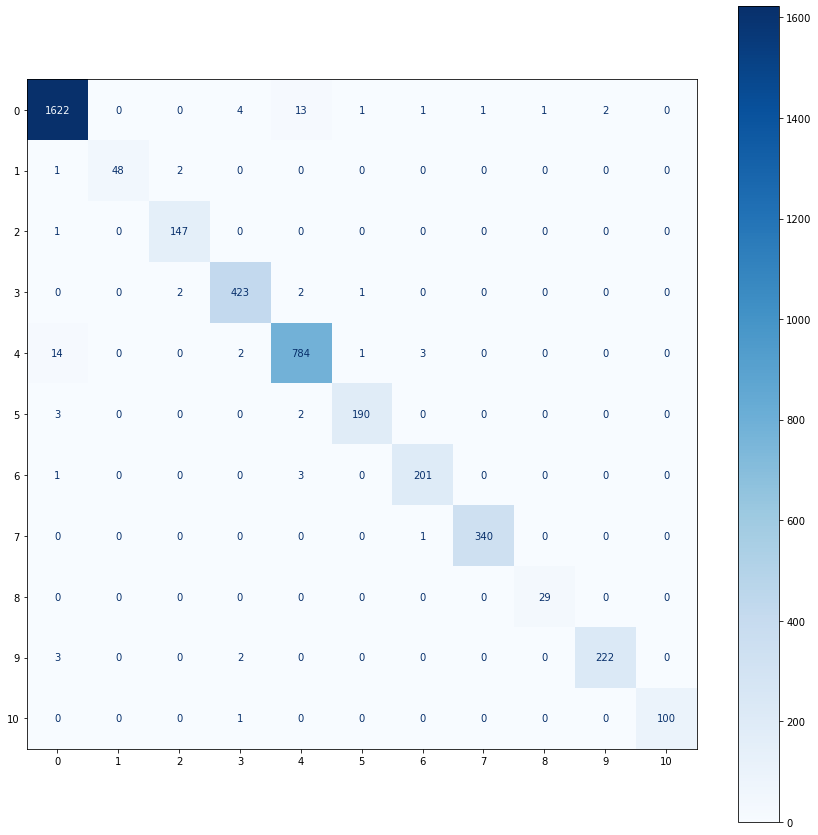

In [11]:
#Confusion Matrix
plot_confusion_matrix(model,x_test,y_test, cmap=plt.cm.Blues)

In [12]:
#Create Scaler for Cross Validation
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


0        A
1        A
2        A
3        A
4        F
        ..
20862    X
20863    G
20864    A
20865    F
20866    H
Name: Class: A, B, C, D, E, F, G, H, I, W, X, Y, Length: 20867, dtype: object

In [26]:
#Cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=3)
yhat_cv = np.ndarray([y.shape[0]], dtype="object")
p_prob_cv = np.zeros((x.shape[0],np.unique(y).size))



for train, test in kfold.split(x,y):
    
    start_time = time.time()
    
    model_cv = MLPClassifier(hidden_layer_sizes=(220,220,220), random_state=3)
    model_cv.fit(x[train], y.values[train])
    yhat_cv[test] = model_cv.predict(x[test])
    yhat_cv_loop = model_cv.predict(x[test])
    p_prob_cv[test] = model_cv.predict_proba(x[test])
    
    run_time = time.time() - start_time
    print("Run time: ", run_time)

    probV = metrics.accuracy_score(y[test],yhat_cv_loop)
#     print(pred_prob.shape)
    print(probV)

print("Accuracy: ", metrics.accuracy_score(y, yhat_cv))

# print(yhat_cv)
# print(p_prob_cv)

Run time:  126.83156824111938
0.9846669861044561
Run time:  103.21766066551208
0.9796358409199808
Run time:  133.05456256866455
0.975796788880901
Run time:  106.79964661598206
0.9717229810687754
Run time:  155.55748534202576
0.98705966930266
Accuracy:  0.979776680883692
